# Flourescence intensities in plant roots

In [1]:
import os
from urllib.request import urlretrieve
import warnings
warnings.simplefilter("ignore")

# load the database from the example repository and the first image as an example
urls = ["https://bitbucket.org/fabry_biophysics/clickpointsexamples/raw/tip/PlantRoot/plant_root.cdb", "https://bytebucket.org/fabry_biophysics/clickpointsexamples/raw/tip/PlantRoot/1-0min.tif", "https://bytebucket.org/fabry_biophysics/clickpointsexamples/raw/tip/PlantRoot/1-2min.tif", "https://bytebucket.org/fabry_biophysics/clickpointsexamples/raw/tip/PlantRoot/1-4min.tif", "https://bytebucket.org/fabry_biophysics/clickpointsexamples/raw/tip/PlantRoot/1-6min.tif", "https://bytebucket.org/fabry_biophysics/clickpointsexamples/raw/tip/PlantRoot/1-8min.tif", "https://bytebucket.org/fabry_biophysics/clickpointsexamples/raw/tip/PlantRoot/1-10min.tif"]
for url in urls:
    file = os.path.basename(url)
    if not os.path.exists(file):
        print("Downloading File", file)
        urlretrieve(url, file)

In [2]:
import re
import numpy as np
from matplotlib import pyplot as plt
import clickpoints

# open the ClickPoints database
db = clickpoints.DataFile("plant_root.cdb")

path plant_root.cdb
Open database with version 18


In [3]:
# get images and mask_types
images = db.getImages()
mask_types = db.getMaskTypes()

# regular expression to get time from filename
regex = re.compile(r".*(?P<experiment>\d*)-(?P<time>\d*)min")

# initialize arrays for times and intensities
times = []
intensities = []

# iterate over all images
for image in images:
    print("Image", image.filename)
    # get time from filename
    time = float(regex.match(image.filename).groupdict()["time"])
    times.append(time)

    # get mask and green channel of image
    mask = image.mask.data
    green_channel = image.data[:, :, 1]

    # iterate over the mask types
    intensity = []
    for mask_type in mask_types:
        # filter from the mask the current mask type
        mask_for_this_type = (mask == mask_type.index)
        # calculate the mean intenstiry of this cell in the green channel
        mean_intensitry_in_cell = np.mean(green_channel[mask_for_this_type])
        # and add it to the list
        intensity.append(mean_intensitry_in_cell)
    # add all the mean intensities of the cells in this image to a list
    intensities.append(intensity)

Image 1-0min.tif
Image 1-2min.tif
Image 1-4min.tif
Image 1-6min.tif
Image 1-8min.tif
Image 1-10min.tif


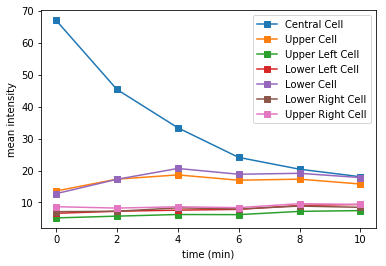

In [4]:
# convert lists to numpy arrays
intensities = np.array(intensities).T
times = np.array(times)

# iterate over cells
for mask_type, cell_int in zip(mask_types, intensities):
    plt.plot(times, cell_int, "-s", label=mask_type.name)

# add legend and labels
plt.legend()
plt.xlabel("time (min)")
plt.ylabel("mean intensity")
# display the plot
plt.show()

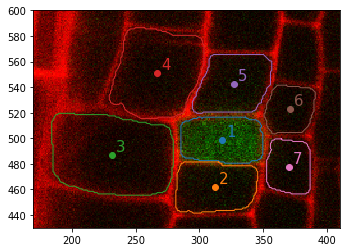

In [5]:
from skimage.measure import regionprops, label, find_contours

# get the first image
image = db.getImage(0)
# get the corresponding mask data
mask_data = image.mask.data
# iterate over all mask types
for mask_type in mask_types:
    # get the mask data for that mask type
    mask = (mask_data == mask_type.index)
    
    # get the contour of the masked region and draw it
    contour = find_contours(mask, 0.5)[0]
    line, = plt.plot(contour[:, 1], contour[:, 0], '-', lw=1)
    
    # get the centroid and draw a dot with the same color
    prop = regionprops(label(mask))[0]
    y, x = prop.centroid
    plt.plot(x, y, 'o', color=line.get_color())
    # and a text showing the index of the mask type with the same color
    plt.text(x+3, y+3, '%d' % mask_type.index, color=line.get_color(), fontsize=15)
# draw the image
plt.imshow(image.data)
# and zoom in
plt.xlim(170, 410)
plt.ylim(430, 600)
plt.show()